In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import scipy
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
print (scipy.__version__)
from IPython.display import Image

1.7.3


# <a id=1>Dataset Amazon Top 50 Bestselling Books 2009 – 2022</a>

In [10]:
data = pd.read_csv('bestsellers_with_categories_2022_03_27.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


In [11]:
data.shape

(700, 7)

### Il dataset contiene le top 50 dei libri più venduti su Amazon dal 2009 al 2022. Contiene, dunque, 700 libri divisi in generi Fiction e Non Fiction.

In questo dataset possiamo trovare 7 colonne:
* Name: Il nome del libro
* Author: L'autore
* User Rating: Le valutazioni degli utenti su Amazon
* Reviews: Il numero di recensioni su Amazon
* Price: Il prezzo del libro
* Year: L'anno in cui il libro si è classificato tra i bestseller
* Genre: Fiction o Non Fiction

Dividiamo il dataset in features qualitative, quantitative e proviamo ad estrarre qualche informazione di base. 

In [12]:
quantitative_data = data[['User Rating','Reviews','Price','Year']]
qualitative_data = data[['Name','Author','Genre']]

In [13]:
quantitative_data.describe()

,User Rating,Reviews,Price,Year
count,700.000000,700.000000,700.000000,700.000000
mean,4.639857,19255.195714,12.700000,2015.500000
std,0.218586,23613.443875,9.915162,4.034011
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4987.250000,7.000000,2012.000000
50%,4.700000,10284.000000,11.000000,2015.500000
75%,4.800000,23358.000000,15.000000,2019.000000
max,4.900000,208917.000000,105.000000,2022.000000


In [14]:
qualitative_data.describe()

,Name,Author,Genre
count,700,700,700
unique,441,305,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,14,388


* Il libro più presente nei bestselling è Publication Manual of the American Psychological Association (10 volte)
* The author who wrote 🖊️ the most a lot of bestselling books is Jeff Kinney (14 libri)
* Non ci sono valori mancanti da sistemare

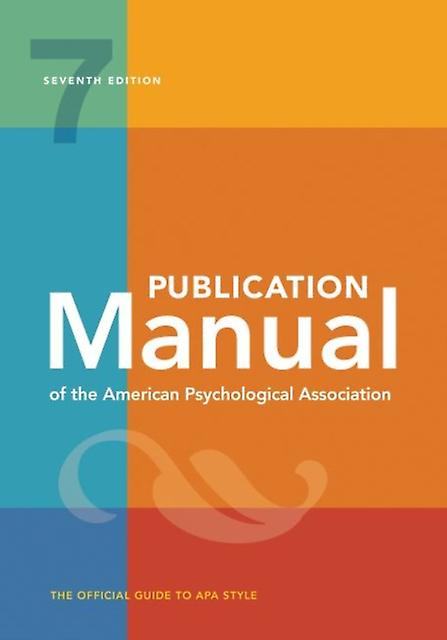

In [15]:
Image(filename='pmapa.jpg', width = 250, height = 100)

In [16]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Proviamo a capire se c'erano dei valori mancanti che sono stati già trasformati in precedenza o se i dati sono impeccabili.

In [17]:
data[data["Name"].str.contains("The Wonderful Things You Will Be")]

,Name,Author,User Rating,Reviews,Price,Year,Genre
393,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,8842,10,2016,Fiction
443,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,8842,10,2017,Fiction
496,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,8842,10,2018,Fiction
541,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,8842,10,2019,Fiction
646,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,20920,9,2021,Fiction
695,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,20920,9,2022,Fiction


In [18]:
data[data["Price"] == 0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
94,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
103,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
205,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
247,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
258,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
265,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
269,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
294,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction
347,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
383,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction


Evidentemente i dati sono stati riempiti visto che il numero di reviews per un determinato libro è statico e non sempre crescente negli anni. 
Inoltre il prezzo di alcuni libri risulta essere pari a 0, questo rafforza la nostra tesi.

In [19]:
years = data['Year'].unique()
print(years)

books = data['Name'].unique()
print("Numero libri: " + str(len(books)))

authors = data['Author'].unique()
print("Numero autori: " + str(len(authors)))

prices = data['Price'].unique()
print("Numero prezzi: " + str(len(prices)))

genres = data['Genre'].unique()
print("Numero generi: " + str(len(genres)))

[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Numero libri: 441
Numero autori: 305
Numero prezzi: 40
Numero generi: 2


### Il dataset contiene 441 libri diversi scritti da 305 autori. Tutti i libri sono rappresentati in due categorie (Fiction, Non Fiction). 

# <a id=2>Studiamo le peculiarità dei libri capolavoro</a>

## User Rating 💯: Quanto è apprezzato il libro?
* La colonna "User Rating" è molto importante perchè morstra quanto è apprezzato il libro.
* La valutazione è un massimo di 5 stelle e il valore maggiore è 4.9.

## <font color='green'>La distribuzione delle User Rating</font>

(array([  1.,   1.,   0.,   5.,  15.,  15.,  72.,  68., 263., 260.]),
 array([3.3 , 3.46, 3.62, 3.78, 3.94, 4.1 , 4.26, 4.42, 4.58, 4.74, 4.9 ]),
 <BarContainer object of 10 artists>)

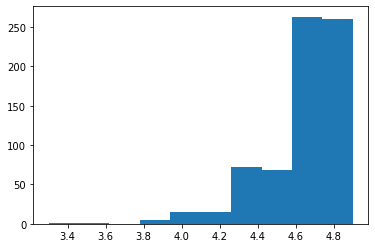

In [20]:
plt.figure()
plt.hist(data['User Rating'])

In [21]:
less = data["User Rating"] >= 4.8
less.sum()

260

In [22]:
more = data["User Rating"] < 4
more.sum()

7

* C'è una piccola variazione nella valutazione degli utenti.

* 260 libri hanno una valutazione di 4.8 o 4.9.

* La valutazione di 7 libri è inferiore a 4.0.

### I libri con User Rating⭐ maggiore

In [23]:
data[data["User Rating"] == 4.9].head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
115,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
160,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction
162,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction
167,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
212,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2013,Fiction


# T-test per vedere sullo User Rating medio dell'anno 2020
H0 = "User Rating medio dell'anno 2020 è uguale allo user rating medio dei restanti anni"

HA = "Ci sono differenze tra lo User Rating medio dell'anno 2020 e quello dei restanti anni"

Sappiamo che si devono verificare alcune ipotesi:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

Siccome il campione deve essere tratto in modo indipendente


Se p-value < livello di significatività rigettiamo l'ipotesi nulla. 

Se p-value > livello di significatività non possiamo rigettare l'ipotesi nulla

Livello di confidenza: 95%

Livello di significatività: 0.05

In [24]:
t_statistic, p_value = stats.ttest_1samp(a=data['User Rating'][data['Year']==2020], popmean=data['User Rating'][data['Year']!=2020].mean(),alternative='two-sided')
print(t_statistic)
print(p_value)

3.8585550672821474
0.0003336154016128745


Il p_value ottenuto e' inferiore al livello di significativita' fissato, quindi possiamo rigettare l'ipotesi nulla, in favore del fatto che ci sono differenze tra lo User Rating medio dell'anno 2020 e quello dei restanti anni. 

Ora testiamo le restanti ipotesi alternative

H0 = "User Rating medio dell'anno 2020 è maggiore allo user rating medio dei restanti anni"

In [25]:
t_statistic, p_value = stats.ttest_1samp(a= data['User Rating'][data['Year']==2020], popmean= data['User Rating'][data['Year']!=2020].mean(),alternative='less')
print(t_statistic)
print(p_value)

3.8585550672821474
0.9998331922991935


Il p_value ottenuto è maggiore al livello di significativita' fissato, quindi non possiamo rigettare l'ipotesi nulla

## Reviews: Il numero di recensioni 📝 dei lettori

* La colonna "Reviews" mostra il numero di recensioni.

* Su Amazon le recensioni sono informazioni molto affidabili ed essenziali. Molti consumatori decidono se acquistare o meno qualcosa riferendosi alle recensioni di altri.

* Un gran numero di recensioni indica che così tanti lettori vogliono valutare il libro, quindi possiamo intuire che esiste una relazione tra popolarità e numero di recensioni.


## <font color='green'>La distribuzione delle Reviews</font>

(array([484., 131.,  43.,  29.,   7.,   2.,   2.,   0.,   0.,   2.]),
 array([3.70000e+01, 2.09250e+04, 4.18130e+04, 6.27010e+04, 8.35890e+04,
        1.04477e+05, 1.25365e+05, 1.46253e+05, 1.67141e+05, 1.88029e+05,
        2.08917e+05]),
 <BarContainer object of 10 artists>)

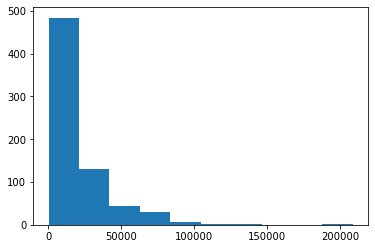

In [26]:
plt.figure()
plt.hist(data['Reviews'])

* C'è una piccola variazione nel numero di recensioni.

* Solo pochi libri hanno più di 50k recensioni.

## <font color='green'>Reviews medi dei libri per anno</font>

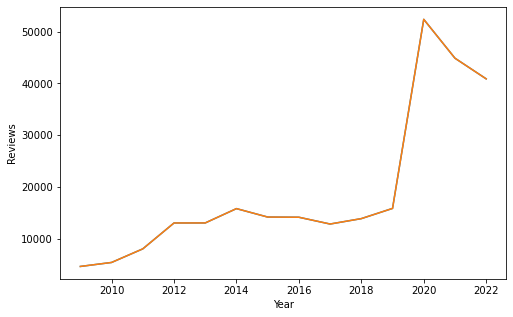

In [27]:
rev = data.groupby('Year')['Reviews'].mean()
rev.plot(figsize=(8, 5))
plt.plot(rev)
plt.xlabel("Year")
plt.ylabel("Reviews")
plt.show()

Sembra esserci un aumento nel numero di reviews degli utenti per i libri più venduti nel corso degli anni. Abbiamo un punto di gomito nell'anno 2019 per cui l'anno 2020 sembra avere un'elevata quantità di recensioni degli utenti. La pandemia di Covid-19 potrebbe aver insinuato le persone a tornare a leggere libri, e questo potrebbe essere il motivo dell'aumento delle quantità di recensioni.

###  Il libro che ha il maggior numero di recensioni 🖋️

In [28]:
data[data["Reviews"] == data["Reviews"].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
699,Where the Crawdads Sing,Delia Owens,4.8,208917,10,2022,Fiction


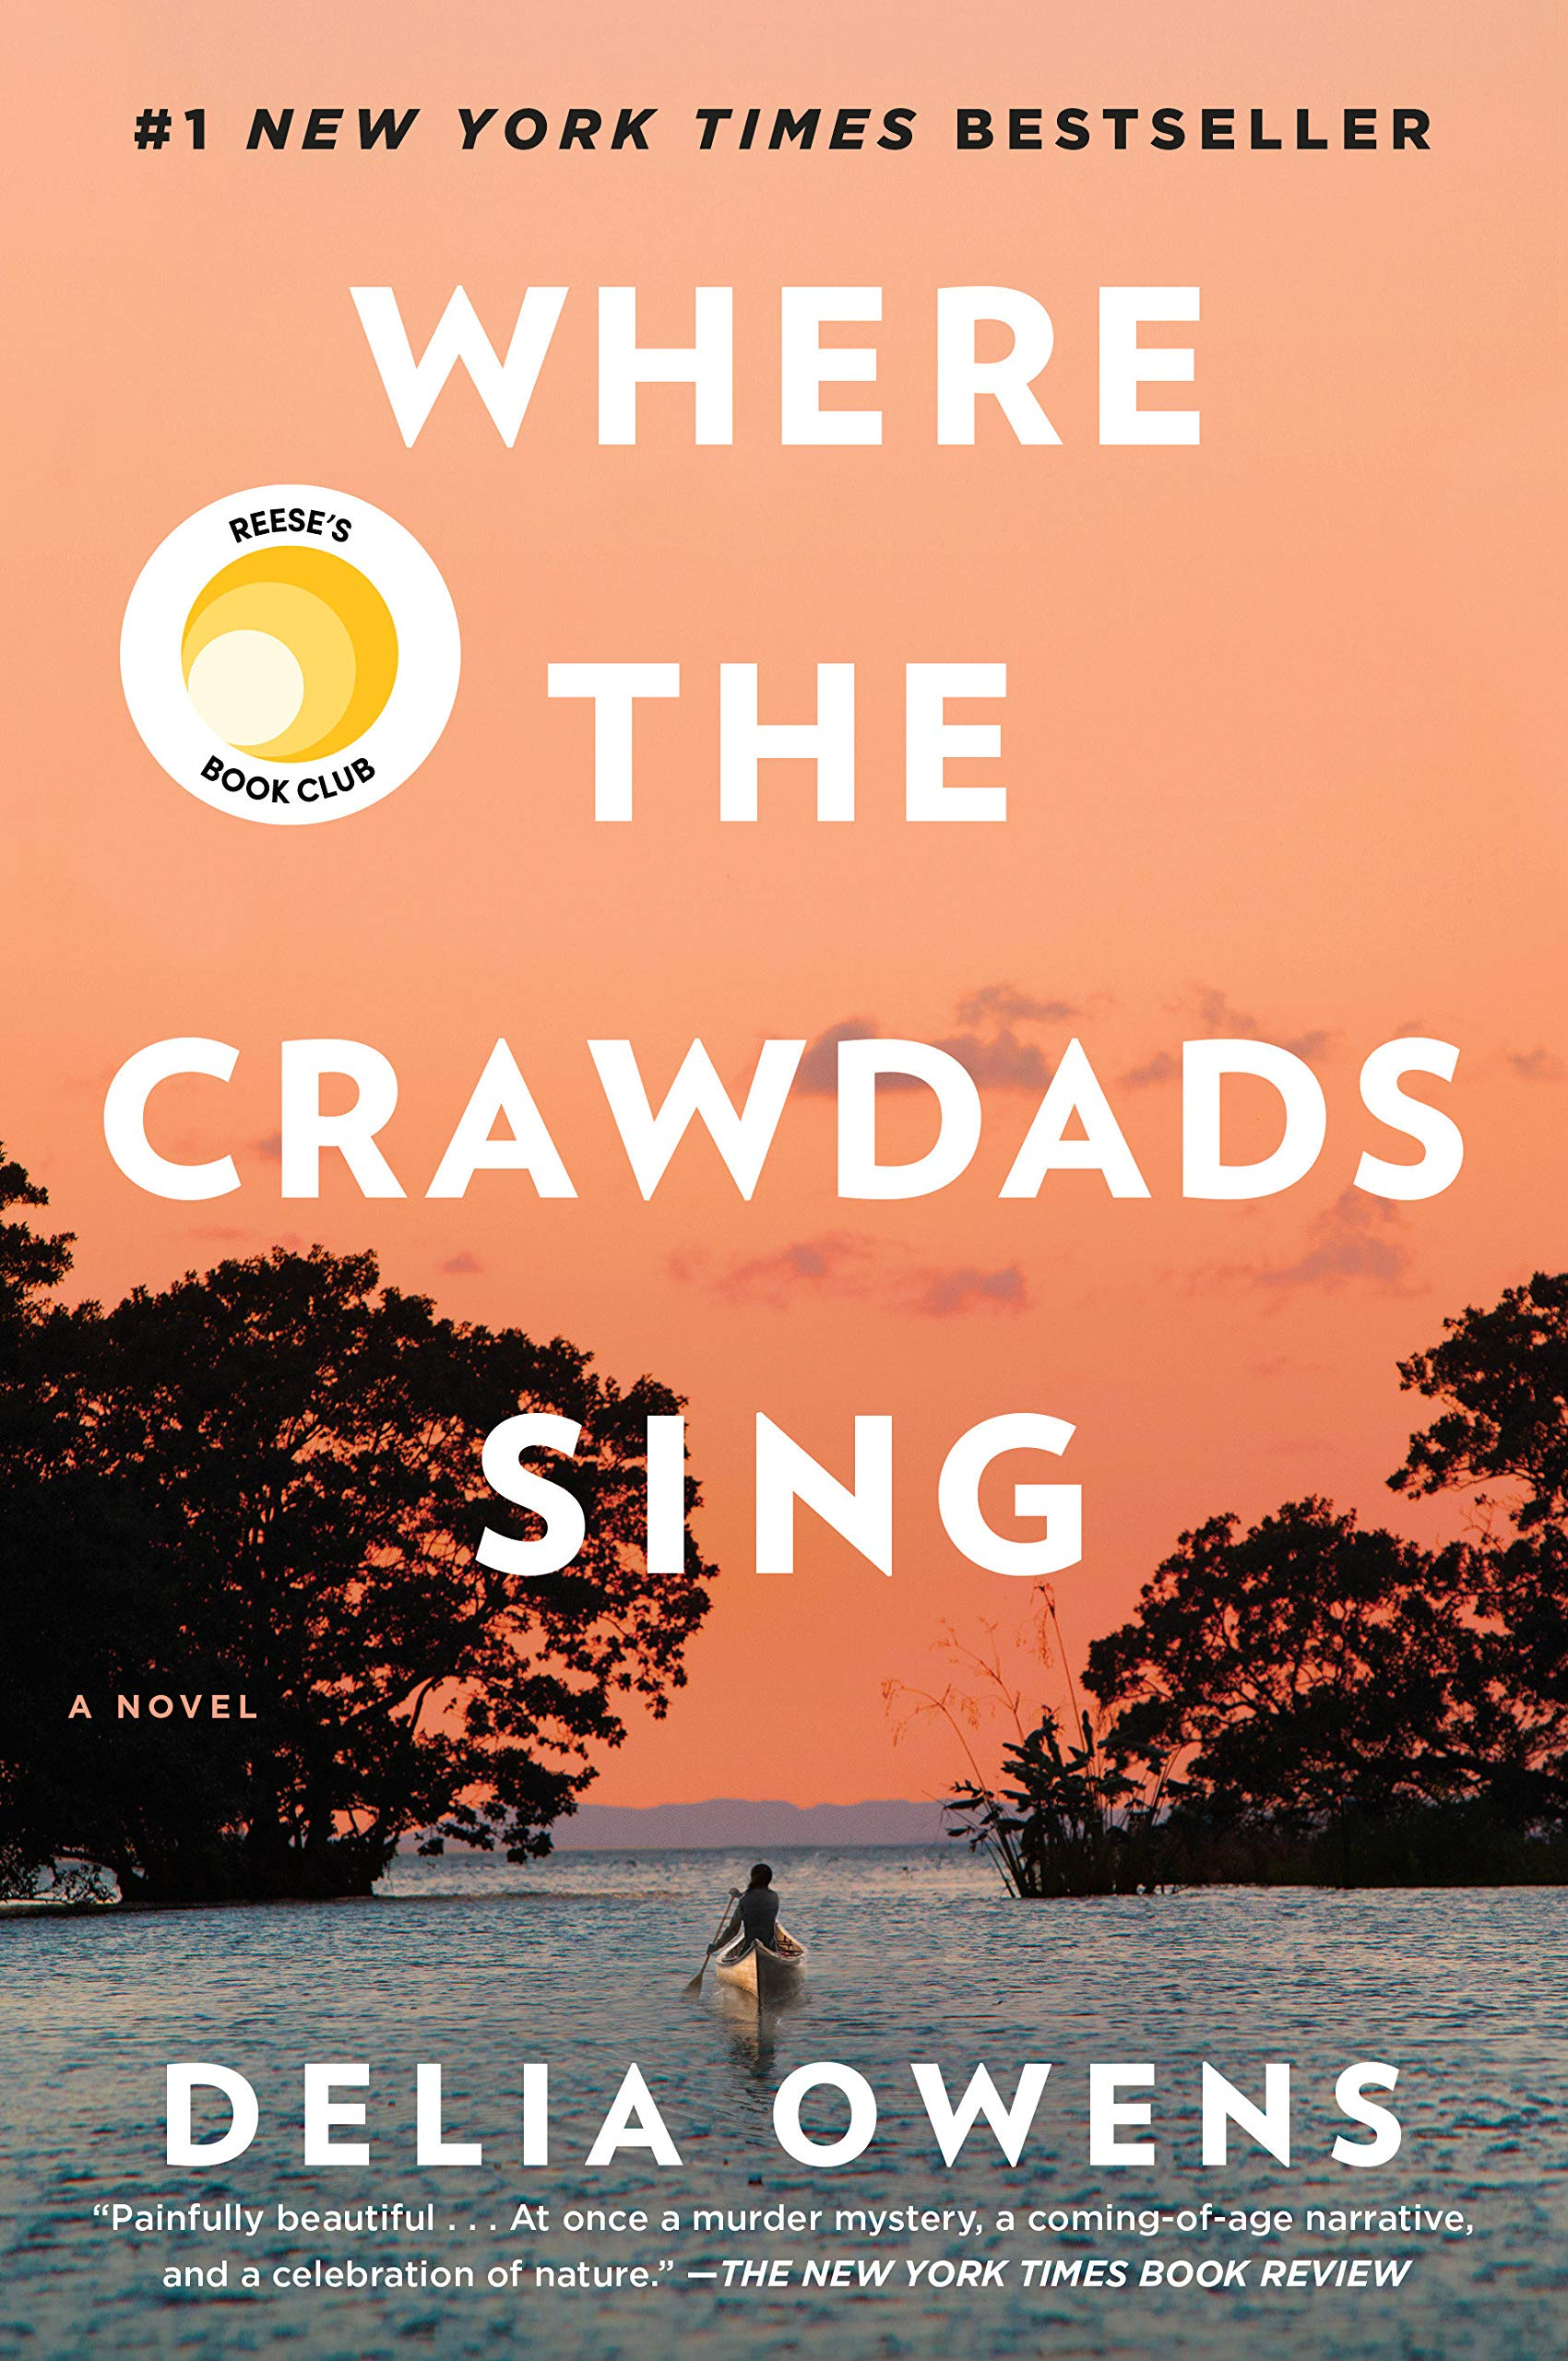

In [29]:
Image(filename='wtcs.jpg', width = 250, height = 100)

## <a id='rel'>La relazione tra lo User Rating e Reviews</a>

<AxesSubplot:xlabel='User Rating', ylabel='Reviews'>

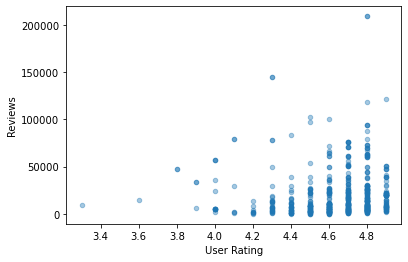

In [30]:
data.plot(kind= 'scatter', x='User Rating', y='Reviews', alpha=0.4)

* Il grafico mostra che i libri che hanno una valutazione relativamente bassa non hanno molte recensioni.
* Possiamo vedere che non c'è correlazione tra User Rating e numero di recensioni. 
* Possiamo notare che un libro con un alto User Rating può avere meno reviews di uno con la valutazione minore. 
Il dato non è normalizzato e quindi prima di comparare l'apprezzamento dei libri dobbiamo assicurarci che avvenga guardando anche il numero di reviews.

* v is the number of votes for the book
* m is the minimum votes required to be listed in the chart
* R is the average rating of the book
* C is the mean vote across the whole report

Then we calculate the weighted rating using Bayesian Average:

W_Rating = (v*R / (v+m) ) + ( m*C / (v+m))

In [31]:
C=data['User Rating'].mean()
m=data['Reviews'].min()
def weighted_rating(x, m=m, C=C):
    v = x['Reviews']
    R = x['User Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [32]:
W_Rating=weighted_rating(data,m=m,C=C)
data['Popularity']=W_Rating

In [33]:
data=data.sort_values('Popularity',ascending=False)
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Popularity
550,A Promised Land,Barack Obama,4.9,121109,16,2020,Non Fiction,4.899921
659,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4,2022,Fiction,4.899812
618,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4,2021,Fiction,4.899812
568,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4,2020,Fiction,4.899812
645,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5,2021,Fiction,4.899796


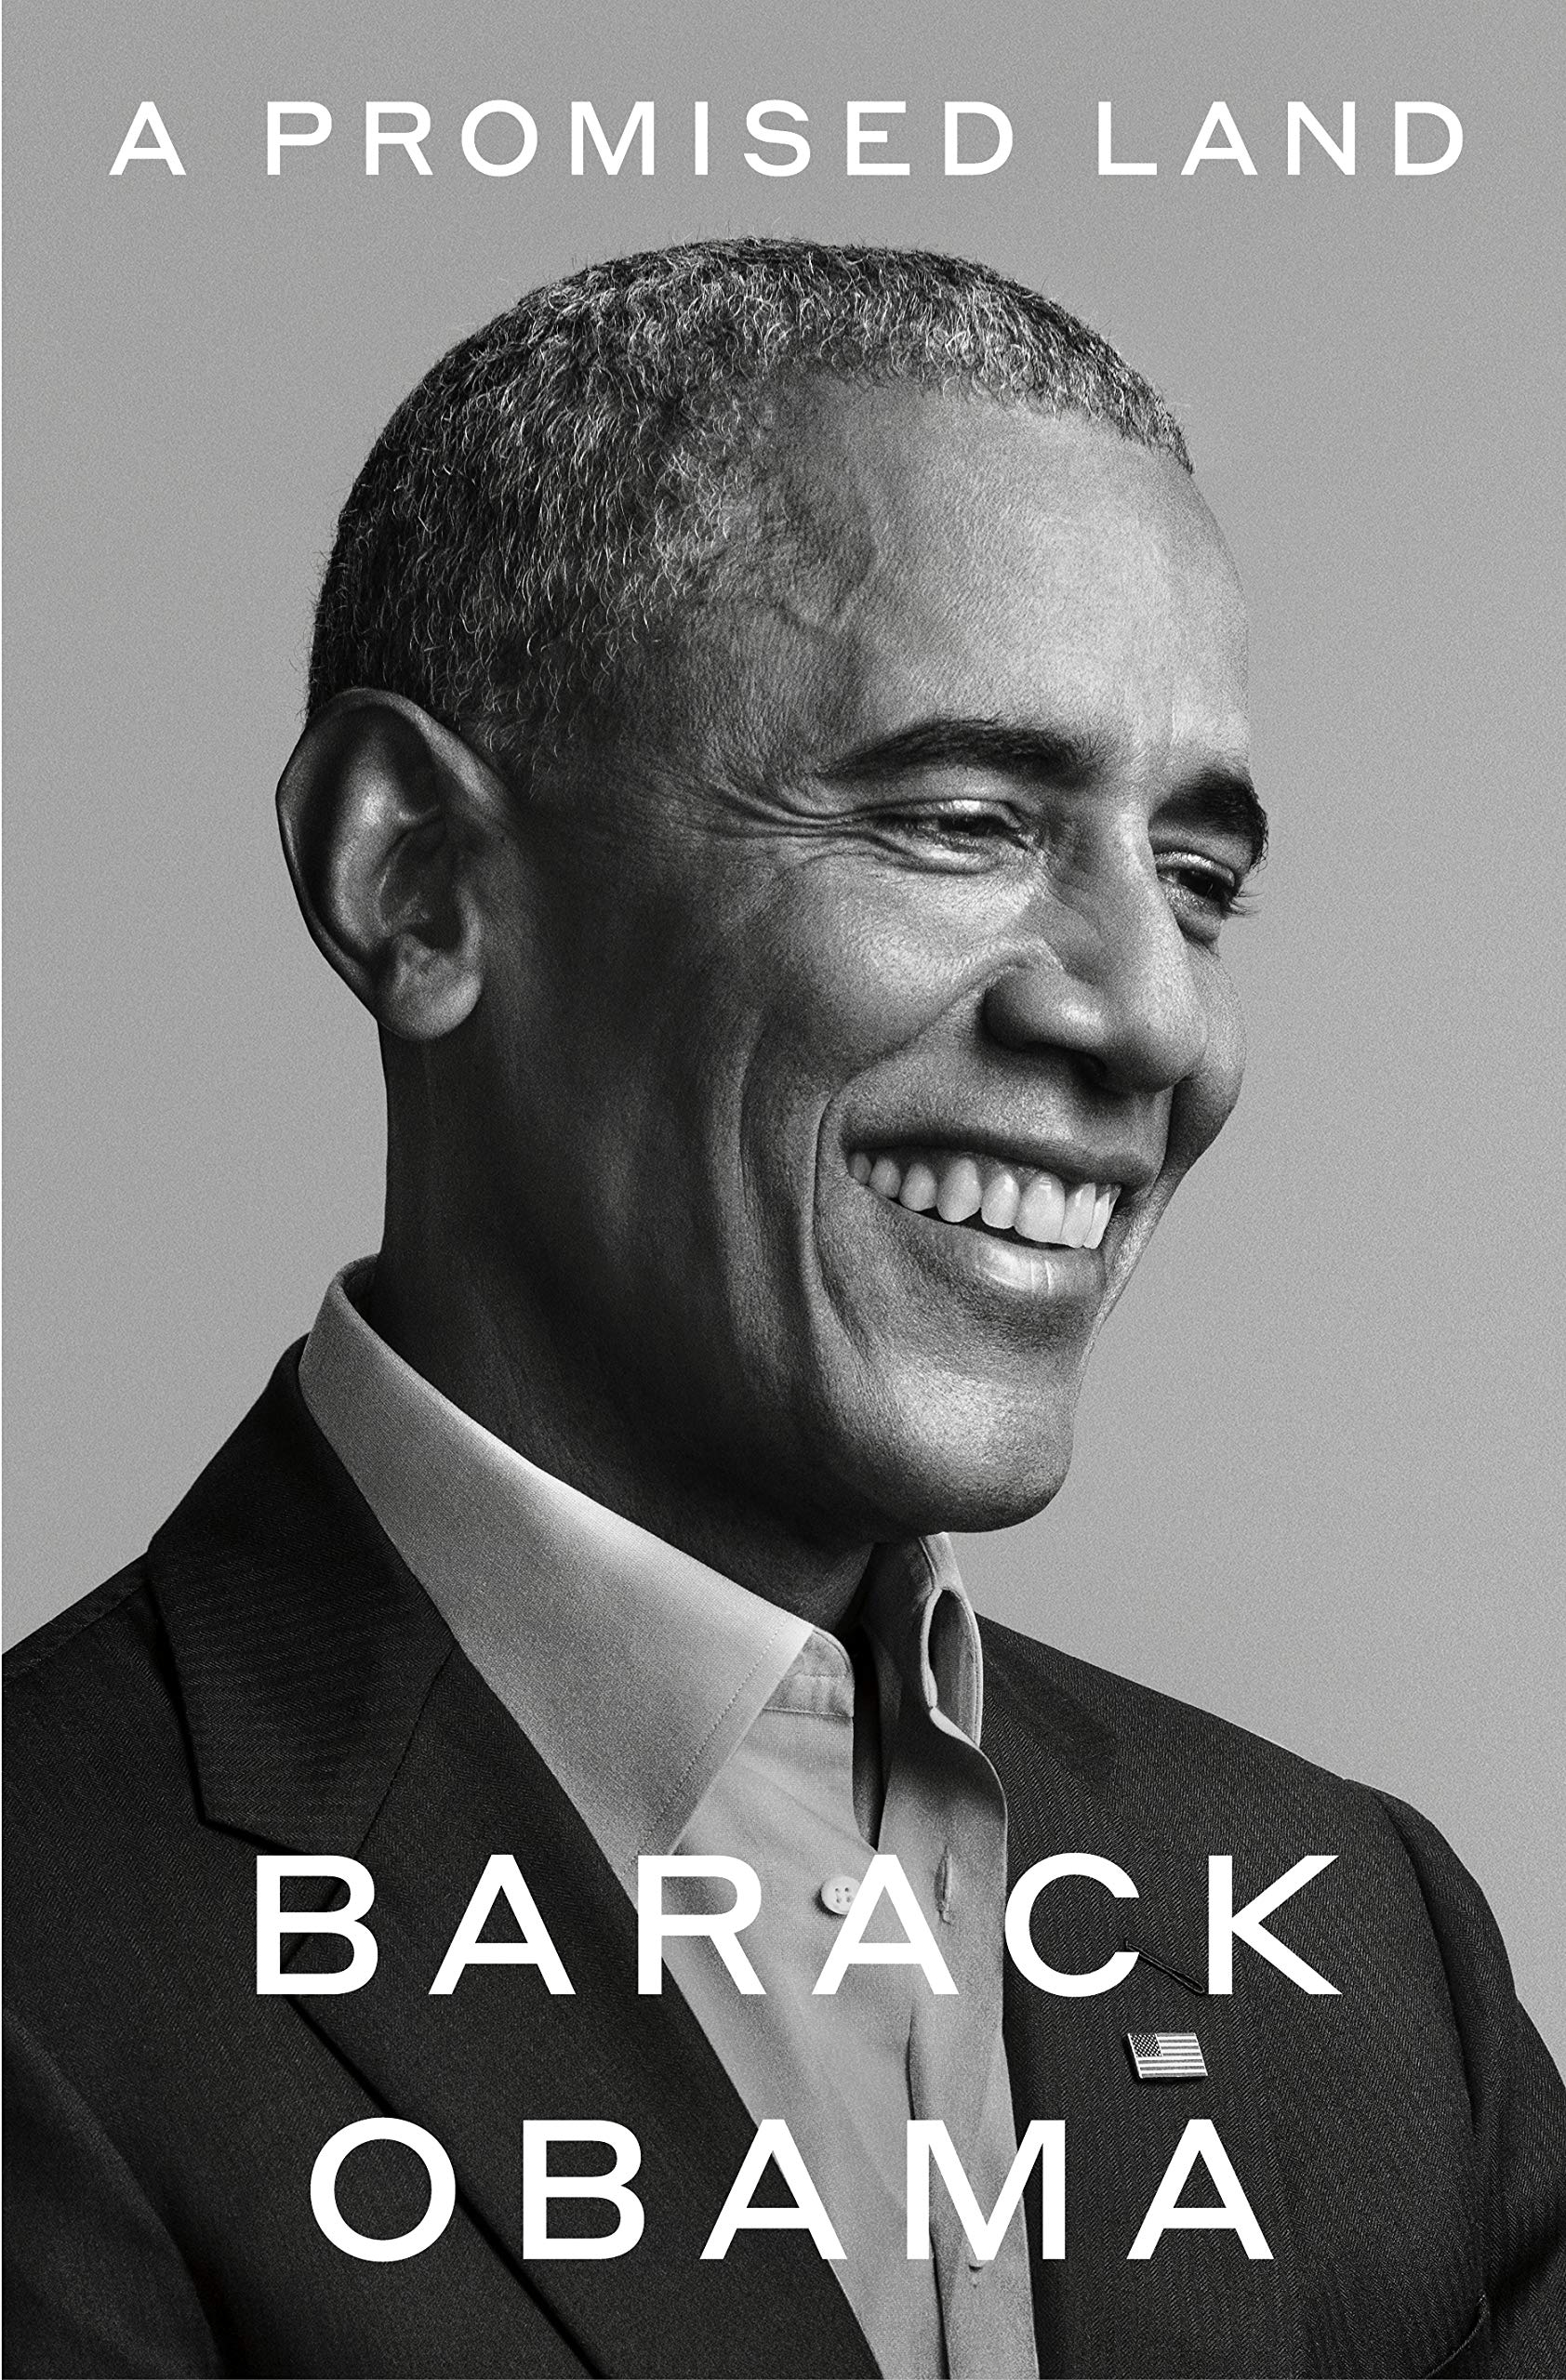

In [34]:
Image(filename='obama.jpg', width = 250, height = 100)

### <font color='green'>Popolarità media per anno</font>

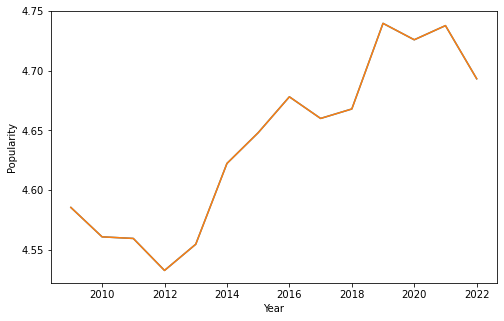

In [35]:
fiction = data[data["Genre"] == "Fiction"]
nonFiction = data[data["Genre"] == "Non Fiction"]
rev = data.groupby('Year')['Popularity'].mean()
rev.plot(figsize=(8, 5))
plt.plot(rev)
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

Come il numero di recensioni anche la popolarità media dei libri bestseller sembrerebbe crescere con il passare degli anni

# <a id=3>Fiction vs Non Fiction</a>

### <font color='green'>La distribuzione dei generi</font>

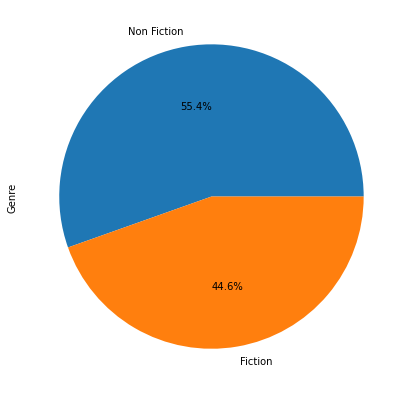

In [36]:
data['Genre'].value_counts().plot.pie(autopct="%.1f%%", figsize=(7, 7));

Possiamo vedere che ci sono più libri Non Fiction che Fiction.

### <font color='green'>La distribuzione dei generi negli anni</font>

[Text(0.5, 1.0, 'Distribuzione dei generi negli anni 2009-2022')]

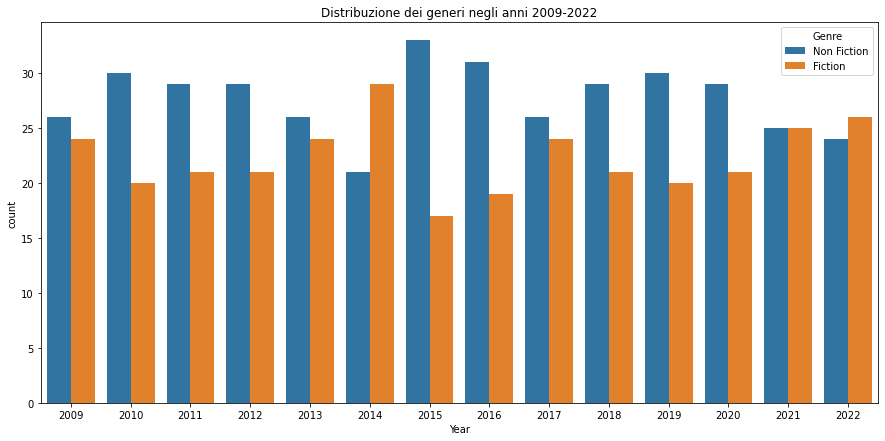

In [37]:
plt.figure(figsize=(15, 7))

sns.countplot(x="Year",
             hue="Genre",
             data=data).set(title='Distribuzione dei generi negli anni 2009-2022')

Ci sono più libri Non Fiction che fanno parte dei 50 libri più venduti di Amazon quasi tutti gli anni. Potrebbe sembrare che sia meglio puntare sui libri Non Fiction piuttosto che Fiction, facciamo un'analisi più approfondita.

### Consideriamo ora il numero di reviews per genere

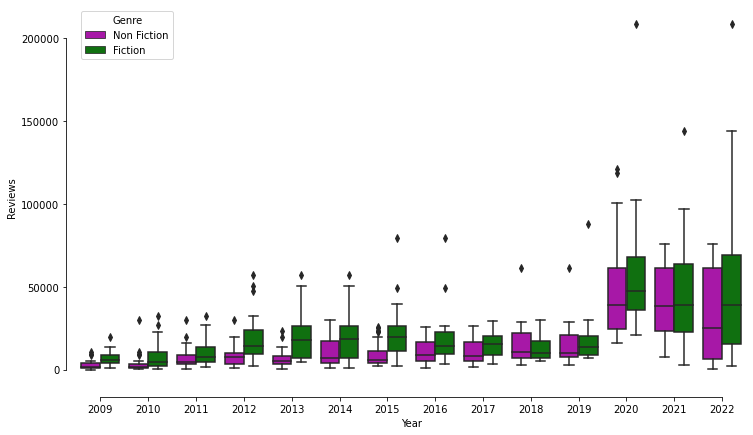

In [38]:
plt.figure(figsize=(12, 7))

sns.boxplot(x="Year", y="Reviews",
            hue="Genre", palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True)

Quasi tutti gli anni i libri Fiction hanno più reviews.

Inoltre il volume delle recensioni è aumentato in larga misura sia per il genere Fiction che Non Fiction a partire dall'anno 2020. Ciò rafforza la nostra tesi che le persone sono tornate a leggere libri durante la pandemia. Il lockdown e lo smartworking hanno portato le persone ad avere più tempo libero nelle loro mani, quindi si può vedere che il volume delle recensioni su Amazon è aumentato improvvisamente dal 2020.

In [39]:
data.head(15)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Popularity
550,A Promised Land,Barack Obama,4.9,121109,16,2020,Non Fiction,4.899921
659,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4,2022,Fiction,4.899812
618,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4,2021,Fiction,4.899812
568,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4,2020,Fiction,4.899812
645,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5,2021,Fiction,4.899796
592,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5,2020,Fiction,4.899796
693,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5,2022,Fiction,4.899796
558,Dog Man: Grime and Punishment: A Graphic Novel...,Dav Pilkey,4.9,41021,6,2020,Fiction,4.899766
605,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,38969,5,2021,Fiction,4.899753
554,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,38969,5,2020,Fiction,4.899753


Vedendo la classifica notiamo che i libri Fiction sono più popolari e apprezzati rispetto ai Non Fiction

In [40]:
data.groupby('Genre')['Price'].mean()

Genre
Fiction        10.663462
Non Fiction    14.337629
Name: Price, dtype: float64

Uno dei motivi per cui i libri fiction sono cosi popolari potrebbe essere che mediamente sono più economici rispetto ai Non Fiction.

Il prezzo basso potrebbe anche essere una conseguenza dalla popolarità. Il prezzo viene tenuto basso perchè vengono vendute molte copie (faremo l'analisi con i grafici e t-test)

Vediamo ora la distribuzione dei prezzi

## <font color='green'>La distribuzione dei prezzi</font>

(array([339., 288.,  46.,  10.,  12.,   2.,   0.,   1.,   0.,   2.]),
 array([  0. ,  10.5,  21. ,  31.5,  42. ,  52.5,  63. ,  73.5,  84. ,
         94.5, 105. ]),
 <BarContainer object of 10 artists>)

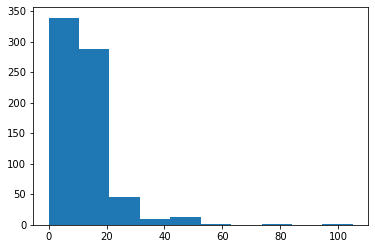

In [41]:
plt.figure()
plt.hist(data['Price'])

* I libri non vengono venduti tanto solo perché costano poco.
* Tuttavia, è anche vero che i bambini o le persone che di solito non leggono libri possono facilmente acquistare libri poco costosi.
* La maggior parte dei libri più venduti ha un prezzo inferiore a 20 dollari.

## <font color='green'>Prezzo medio dei libri per anno</font>

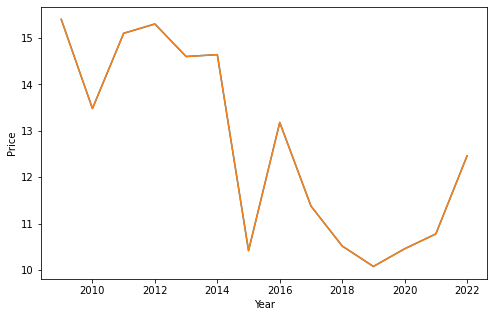

In [42]:
price = data.groupby('Year')['Price'].mean()
price.plot(figsize=(8, 5))
plt.plot(price)
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

* Possiamo vedere come il prezzo dei libri sia sceso sensibilmente e ora stia risalendo

* Un altro motivo dell'improvviso aumento del numero di recensioni e valutazioni degli utenti su Amazon potrebbe essere attribuito al prezzo dei libri. Sembra che i prezzi dei libri siano diminuiti in modo significativo su Amazon. 

* I prezzi dei romanzi bestelling insieme agli effetti della pandemia di covid-19 hanno indotto più persone ad acquistare libri e recensirli su Amazon.

Traformiamo il genere in un dato quantitativo

In [43]:
data['Genre'] = np.where(data['Genre']=='Non Fiction', 0, 1)

In [44]:
data.corr(method='pearson')

,User Rating,Reviews,Price,Year,Genre,Popularity
User Rating,1.000000,0.080423,-0.157253,0.286601,0.099536,0.999885
Reviews,0.080423,1.000000,-0.114554,0.494279,0.181611,0.079019
Price,-0.157253,-0.114554,1.000000,-0.155266,-0.184317,-0.156988
Year,0.286601,0.494279,-0.155266,1.000000,0.016399,0.286383
Genre,0.099536,0.181611,-0.184317,0.016399,1.000000,0.097763
Popularity,0.999885,0.079019,-0.156988,0.286383,0.097763,1.000000


<AxesSubplot:>

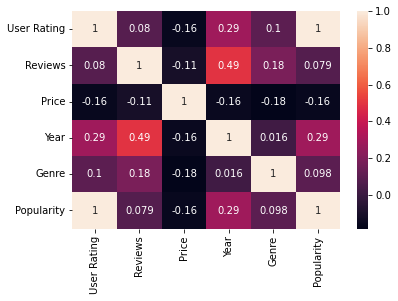

In [45]:
sns.heatmap(data.corr(method='pearson'), annot=True)

Sembra esserci una debole correlazione positiva (0,49) tra Recensioni e Anno. Ciò significa che, con il passare degli anni, il numero di Recensioni dei primi 50 romanzi più venduti su Amazon aumenta.

È sorprendente vedere che non esiste alcuna correlazione tra il numero di Recensioni e Valutazioni degli utenti. Ciò potrebbe essere dovuto al fatto che il nostro dataset è limitato solo ai primi 50 libri più venduti (che avranno solo valutazioni elevate).

# <a id='pred'><font color='green'>L'utilizzo del nome del libro per predire il genere</font></a>

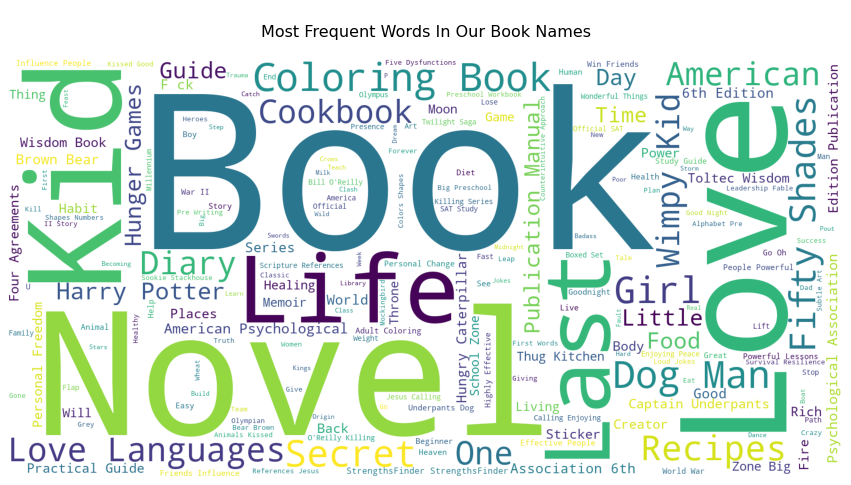

In [46]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color='white', width = 1600, height = 800, stopwords=STOPWORDS).generate(' '.join(data['Name']))
plt.figure(figsize=[15,10])
plt.imshow(wordcloud)
plt.axis('off')
plt.title('\nMost Frequent Words In Our Book Names\n',fontsize=16)
plt.show()

In [47]:
X = data.Name
y = data.Genre == 0

print(X.shape)
print(y.shape)

(700,)
(700,)


In [48]:
# contiamo il numero di parole nei testi, eliminando le stop_words come a, an, the, ...
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [49]:
# trasformiamo il testo in formato Document Term Matrix
X_dtm = vect.fit_transform(X)
print(X_dtm.shape)

(700, 1265)


In [50]:
import sklearn.model_selection as ms
# estraiamo a caso i dati per organizzarli in un insieme di training e validazione
X_train, X_test, y_train, y_test = ms.train_test_split(X_dtm, y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(525, 1265)
(525,)
(175, 1265)
(175,)


In [51]:
# proviamo a vedere che cosa succede applicando la regressione logistica
lr = LogisticRegression()

# Alleniamo il modello di Regressione Logistica sui nostri dati
Model = lr.fit(X_train, y_train)

In [52]:
# Valutiamo il modello ottenuto sui dati di validazione
lr.score(X_test, y_test)

0.9085714285714286

 Siamo riusciti a raggiungere un'accuratezza altissima con un modello di logistic regression.
 Il nome e il genere sono fortemente correlati.

### <a id='pop'>Proviamo a predire ora la poplarità utilizzando la Linear Regression</a>

In [53]:
def RMSE (y_pred,y_true):
    return np.sqrt(1/y_pred.shape[0]*np.sum((y_pred-y_true)**2))

In [54]:
features = np.asarray(list(data.columns))[3:7]
print(features)
x = data[features]
y = data['Popularity']
regressor = LinearRegression()
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=2)
lin_reg = regressor.fit(x_train, y_train)

y_pred = lin_reg.predict(x_valid)
print('RMSE:', RMSE(y_pred,y_valid))

['Reviews' 'Price' 'Year' 'Genre']
RMSE: 0.18725212139242278


Modello Nullo

In [55]:
mean_Popularity = data['Popularity'].mean()

# create la nuova x con lo stesso numero di campioni del dataset originale, e con tutti i valori uguali al valore medio del diametro appena calcolato
null_model_y = [mean_Popularity] * data.shape[0]

print ('RMSE:', RMSE(y, null_model_y))

RMSE: 0.21681075350534978


L'errore del modello nullo maggiore a quello di regressione lineare